<div style="border: 2px solid red; padding: 10px; border-radius: 5px;">
<strong>Notebook description:</strong>
    
Plotting Abeta ELISA results on iNs

<strong>Input Data:</strong>

`iNbatch01312024_CTP1B-NRF2_AbetaELISAcalculations_djuna_copied.csv'` 


<strong>Figures:</strong>

`ED13`

<strong>Last Run All:</strong>
June 18, 2025


In [1]:
import sys
sys.path.append('/Users/djuna/Documents/ABCA7lof2/')

from ABCA7lof2.utils import apply_custom_plot_style
apply_custom_plot_style()

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import numpy as np
from scipy.stats import mannwhitneyu


def detect_outliers_iqr(data):
    # Compute the first and third quartiles
    Q1, Q3 = np.percentile(data, [25, 75])
    IQR = Q3 - Q1
    
    # Define lower and upper bounds
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    
    # Identify outliers
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers, lower_bound, upper_bound

def plot_boxplot_by_treatment(d, x_val, y_val, order, pairs, palette, pvalues):
    # Draw the boxplot with a semi-transparent fill (alpha=0.5) applied via boxprops.
    ax = sns.barplot(
        data=d, 
        x=x_val, 
        y=y_val, 
        palette=palette, 
        order=order, 
        width=0.6, 
        capsize=0.1, 
        linewidth=1
    )
    # Overlay the stripplot
    sp = sns.stripplot(
        data=d, 
        x=x_val, 
        y=y_val, 
        dodge=True, 
        jitter=0.5, 
        alpha=1,  
        order=order, 
        palette=palette,
        size=3.5
    )


    # Shift the stripplot points slightly to the left.
    shift = 0.1  # Adjust this value as needed
    for i, coll in enumerate(sp.collections):
        if i == 0:
            shift = 0.7
        elif i == 1:
            shift = 0.05
        elif i == 2:
            shift = 0.4
            
        offsets = coll.get_offsets()
        # Subtract from the x-coordinate to move left
        offsets[:, 0] = offsets[:, 0] + shift
        coll.set_offsets(offsets)
    # Add statistical annotations
    annotator = Annotator(ax, pairs, data=d, x=x_val, y=y_val, order=order)
    annotator.configure(text_format='full', loc='outside',line_offset_to_group=10,  # Increases space between the brackets and the plot
    text_offset=5)
    annotator.set_custom_annotations(pvalues)
    annotator.annotate()

    plt.xticks(rotation=0)
    plt.xlabel('')

    # Adjust the boxes so that the face remains semi-transparent while the edge is opaque.
    # Try iterating over both ax.artists and ax.patches.
    for patch in ax.patches:
        # Get the current facecolor (an RGBA tuple)
        fc = patch.get_facecolor()
        # Set the facecolor to have your desired alpha (e.g., 0.5)
        patch.set_facecolor((fc[0], fc[1], fc[2], 0.5))
        # Set the edgecolor to the same RGB but fully opaque (alpha=1)
        patch.set_edgecolor((fc[0], fc[1], fc[2], 1.0))
        patch.set_linewidth(1.5)

    return ax


def plot_boxplot_by_treatment(d, x_val, y_val, order, pairs, palette, ylim, pvalues):
    # Draw the boxplot with a semi-transparent fill (alpha=0.5) applied via boxprops.
    ax = sns.boxplot(
        data=d, 
        x=x_val, 
        y=y_val, 
        palette=palette, 
        order=order, 
        width=0.4, 
       # capsize=0.1, 
        linewidth=1,

        showfliers=False
    )

    ax.set_ylim(0,ylim)
    ax.set_xlim(-0.5, len(order)+5)
    # Overlay the stripplot
    sp = sns.stripplot(
        data=d, 
        x=x_val, 
        y=y_val, 
        dodge=False, 
        jitter=0.05, 
        alpha=1,  
        order=order, 
        color='black',
        #palette=palette,
        size=3
    )

    #plt.ylim(0, plt.ylim()[1])
    # Shift the stripplot points slightly to the left.
    shift = 0.4  # Adjust this value as needed
    for i, coll in enumerate(sp.collections):
        # if i == 0:
        #     shift = 0.4
        # elif i == 1:
        #     shift = 0.4
        # elif i == 2:
        #     shift = 0.4
            
        offsets = coll.get_offsets()
        # Subtract from the x-coordinate to move left
        offsets[:, 0] = offsets[:, 0] + shift
        coll.set_offsets(offsets)
    # Add statistical annotations
    annotator = Annotator(ax, pairs, data=d, x=x_val, y=y_val, order=order)
    annotator.configure(text_format='full', loc='outside',line_offset_to_group=10,  # Increases space between the brackets and the plot
    text_offset=5)
    annotator.set_custom_annotations(pvalues)
    annotator.annotate()

    plt.xticks(rotation=0)
    plt.xlabel('')

    # Adjust the boxes so that the face remains semi-transparent while the edge is opaque.
    # Try iterating over both ax.artists and ax.patches.
    for patch in ax.patches:
        # Get the current facecolor (an RGBA tuple)
        fc = patch.get_facecolor()
        # Set the facecolor to have your desired alpha (e.g., 0.5)
        patch.set_facecolor((fc[0], fc[1], fc[2], 0.5))
        # Set the edgecolor to the same RGB but fully opaque (alpha=1)
        #patch.set_edgecolor((fc[0], fc[1], fc[2], 1.0))
        patch.set_linewidth(1)

    return ax


#plt.savefig('../../paper/main_plots/tmrm_choline_boxplot.png', dpi=300, bbox_inches='tight')


In [3]:
# load data
data = pd.read_csv('../../elisa_data/iNbatch01312024_CTP1B-NRF2_AbetaELISAcalculations_djuna_copied.csv')
# data taken from here https://www.dropbox.com/scl/fo/r9hng8kcsmmnvof7n839v/ANY45rhDfTR-KQHqwQFzcKw/Data/ELISAs/iNbatch02282024_abetaELISAs?rlkey=0m6zt3bihwupnzr30zxgzlyo7&subfolder_nav_tracking=1&dl=0
data = data.iloc[:,:3]
data_subset = data#[(data['Batch']=='CTP1B')] # this is just "plate" not a different diff batch 
data_subset.columns = ['line', 'Abeta40', 'Abeta42']#, 'Batch']
data_subset.index = np.arange(len(data_subset))
data_subset

,line,Abeta40,Abeta42
0,Y622,205.559554,109.392945
1,Y622,275.009951,127.283682
2,Y622,371.919615,193.383080
3,Y622,254.442014,144.551472
4,Y622,364.909135,189.896729
5,Y622,342.941759,184.631465
6,Y622,378.751184,139.811973
7,Y622,340.415710,177.542008
8,WT,239.312114,130.202284
9,WT,312.250317,129.231304


Test for normality and equal variance

In [4]:
from scipy.stats import shapiro, levene, ttest_ind

baseline_data = data_subset[data_subset['line']!='G2']
group1 = baseline_data[baseline_data['line'] == 'Y622']['Abeta40']
group2 = baseline_data[baseline_data['line'] == 'WT']['Abeta40']

stat1, p_norm1 = shapiro(group1)
stat2, p_norm2 = shapiro(group2)
print('comparison 1: WT vs Y622 Abeta40')
print('p_norm1:', p_norm1)
print('p_norm2:', p_norm2)

stat, p_levene = levene(group1, group2)
# Decide whether to assume equal variances
equal_var = p_levene > 0.05 
print('equal variance:', p_levene)

print('--------------------------------')
baseline_data = data_subset[data_subset['line']!='G2']
group1 = baseline_data[baseline_data['line'] == 'Y622']['Abeta42']
group2 = baseline_data[baseline_data['line'] == 'WT']['Abeta42']

stat1, p_norm1 = shapiro(group1)
stat2, p_norm2 = shapiro(group2)
print('comparison 2: WT vs Y622 Abeta42')
print('p_norm1:', p_norm1)
print('p_norm2:', p_norm2)

stat, p_levene = levene(group1, group2)
# Decide whether to assume equal variances
equal_var = p_levene > 0.05 
print('equal variance:', p_levene)

comparison 1: WT vs Y622 Abeta40
p_norm1: 0.17204527864348387
p_norm2: 0.28814839529022823
equal variance: 0.9447100590969989
--------------------------------
comparison 2: WT vs Y622 Abeta42
p_norm1: 0.2840248434902108
p_norm2: 0.030076715767601306
equal variance: 0.012728108632447914


For comparison 1: WT vs Y622 Abeta40; ttest assuming equal variance

For comparison 2: WT vs Y622 Abeta42; Mannwhitney test

WT vs. Y622: p=0.033
WT vs. Y622: p=0.070


/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_25340/2830392423.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/var/folders/y7/zpj5hbtd2bl78b1t9h2723hw0000gn/T/ipykernel_25340/2830392423.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


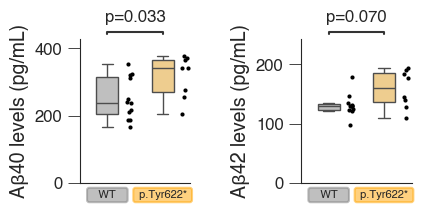

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4, 2))

plt.sca(ax1)

baseline_data = data_subset[data_subset['line']!='G2']
group1 = baseline_data[baseline_data['line'] == 'Y622']['Abeta40']
group2 = baseline_data[baseline_data['line'] == 'WT']['Abeta40']
t_stat, p_value = ttest_ind(group1, group2, equal_var=True)
formatted_pvalues = [f"p={p:.3f}" if p>0.001 else f"p={p:.3e}" for p in [p_value]]

ax1 = plot_boxplot_by_treatment(data_subset[data_subset['line']!='G2'], 'line', 'Abeta40', order = ['WT', 'Y622'], pairs = [('WT', 'Y622')],palette={'WT': 'grey', 'Y622': 'orange', 'G2': 'blue'}, 
                                ylim = np.max(data_subset['Abeta40']+50), pvalues=formatted_pvalues)

ax1.set_xticks([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_ylabel('Aβ40 levels (pg/mL)')

ax1.text(0, -0.05, "   WT   ", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="grey", ec="grey", alpha=0.5), fontsize=8)
ax1.text(1, -0.05, " p.Tyr622* ", ha='center', va='top', transform=ax1.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="orange", ec="orange", alpha=0.5), fontsize=8)
# ax1.text(1.9, -0.05, " p.Glu50fs*3 ", ha='center', va='top', transform=ax1.get_xaxis_transform(),
#          bbox=dict(boxstyle="round,pad=0.2", fc="blue", ec="blue", alpha=0.5), fontsize=8)

plt.sca(ax2)

baseline_data = data_subset[data_subset['line']!='G2']
group1 = baseline_data[baseline_data['line'] == 'Y622']['Abeta42']
group2 = baseline_data[baseline_data['line'] == 'WT']['Abeta42']

s,p_value = mannwhitneyu(group1, group2, alternative='two-sided')
formatted_pvalues = [f"p={p:.3f}" if p>0.001 else f"p={p:.3e}" for p in [p_value]]

ax2 = plot_boxplot_by_treatment(data_subset[data_subset['line']!='G2'], 'line', 'Abeta42', order = ['WT', 'Y622'], pairs = [('WT', 'Y622')],palette={'WT': 'grey', 'Y622': 'orange', 'G2': 'blue'}, 
                                ylim = np.max(data_subset['Abeta42']+50), pvalues=formatted_pvalues)
ax2.set_xticks([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_ylabel('Aβ42 levels (pg/mL)')

ax2.text(0, -0.05, "   WT   ", ha='center', va='top', transform=ax2.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="grey", ec="grey", alpha=0.5), fontsize=8)
ax2.text(1, -0.05, " p.Tyr622* ", ha='center', va='top', transform=ax2.get_xaxis_transform(),
         bbox=dict(boxstyle="round,pad=0.2", fc="orange", ec="orange", alpha=0.5), fontsize=8)
# ax2.text(1.9, -0.05, " p.Glu50fs*3 ", ha='center', va='top', transform=ax2.get_xaxis_transform(),
#          bbox=dict(boxstyle="round,pad=0.2", fc="blue", ec="blue", alpha=0.5), fontsize=8)

plt.subplots_adjust(left=0.07, right=0.9, top=0.8, bottom=0.08, wspace=1)

plt.savefig('/Users/djuna/Documents/ABCA7lof2/editorial_paper/main_panels_svgs/ed13/abeta_elisa_iN.pdf', dpi=300, bbox_inches='tight')